# ⚠️ Ataque de Segunda Pré-imagem em uma Merkle Tree

Nesta seção, vamos **ilustrar o que acontece quando alguém tenta substituir um bloco de dados por outro diferente**, mas que tenha o **mesmo hash**. Essa é a ideia de um **ataque de segunda pré-imagem**.

Em Merkle Trees, a segurança depende da **impossibilidade prática** de encontrar duas entradas diferentes que resultem no mesmo hash.


In [ ]:
import hashlib
import math

# Função de hash SHA-256
def sha256(data):
    if isinstance(data, str):
        data = data.encode('utf-8')
    return hashlib.sha256(data).hexdigest()


In [ ]:
class MerkleTree:
    def __init__(self, data_blocks):
        self.data_blocks = data_blocks
        self.levels = []
        self.build_tree()

    def build_tree(self):
        leaves = [sha256(block) for block in self.data_blocks]
        self.levels.append(leaves)
        current_level = leaves
        while len(current_level) > 1:
            next_level = []
            for i in range(0, len(current_level), 2):
                left = current_level[i]
                right = current_level[i+1] if i+1 < len(current_level) else left
                next_level.append(sha256(left + right))
            self.levels.append(next_level)
            current_level = next_level

    def root(self):
        return self.levels[-1][0] if self.levels else None

    def print_tree(self):
        for i, level in enumerate(self.levels):
            if i == len(self.levels) -1:
                print(f"Raiz :")
            else:
                print(f"Nível {i}:")
            for node in level:
                print(f"  {node}")


In [ ]:
from copy import deepcopy

data = ["bloco A", "bloco B", "bloco C", "bloco D"]
tree_original = MerkleTree(data)
raiz_original = tree_original.root()

print("Raiz original da Merkle Tree:", raiz_original)

Tentativa de segunda pré-imagem: substituímos "bloco C" por "bloco X"

In [ ]:
data_troca = deepcopy(data)
data_troca[2] = "bloco X"  # índice 2 corresponde a "bloco C"
data_troca

In [ ]:
tree_alterada = MerkleTree(data_troca)
raiz_falsa = tree_alterada.root()

print("Nova raiz após substituição:", raiz_falsa)
print("Hashs são iguais?", raiz_original == raiz_falsa)


Mesmo substituindo um único bloco na árvore, a **raiz da Merkle Tree muda completamente**.

Isso mostra por que Merkle Trees são úteis para verificar integridade: **qualquer modificação nos dados altera a raiz**, e como o SHA-256 é resistente a segunda pré-imagem, **não é possível forjar um novo bloco que gere a mesma raiz**.


⚠️ Porém é possivel realizar um Second Preimage Attack com sucesso se você passar outros elementos de prova

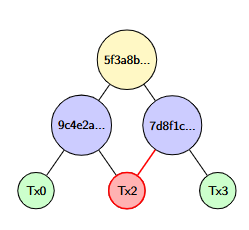